# Problem Set 2

## Question 4

Do Exercise 19.8 in Hansen (2022).

In [1]:
import numpy as np
import pandas as pd

url = 'https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta'
cps09mar = pd.read_stata(url)

In [2]:
cps09mar.columns

Index(['age', 'female', 'hisp', 'education', 'earnings', 'hours', 'week',
       'union', 'uncov', 'region', 'race', 'marital'],
      dtype='object')

In [3]:
df = cps09mar[cps09mar.education == 20].copy()
print(df.shape)
df['exp'] = df['age'] - df['education'] - 6
df = df[(df.exp <= 40) & (df.exp >= 0)]
df['log_wage'] = np.log(df['earnings'] / (df['hours']*df['week']))
print(df.shape)

(1875, 12)
(1819, 14)


(a) Use Nadaraya-Watson to estimate the regression of log(wage) on experience, separately for men and women. Plot with 95% confidence intervals. Comment on how the estimated wage profiles vary with experience. In particular, do you think the evidence suggests that expected wages fall for experience levels above 20 for this education group?

 14 / 100   

/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x
/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)


 23 / 100   

/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/wonjun/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in divide
  return 2 * (Xi - x) * gaussian(h, Xi, x) / h**2


 100 / 100   

Text(0.5, 1.0, 'Male, Local constant regression')

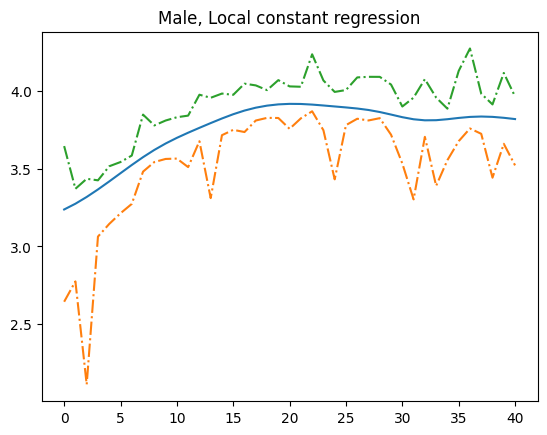

In [4]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import sys
import matplotlib.pyplot as plt

# male
df_temp = df[df.female == 0]
res = KernelReg(endog=df_temp.log_wage,
                exog=df_temp.exp,
                var_type='c',
                reg_type='lc')
x = [i for i in range(41)]
y = res.fit(x)[0]

# bootstrap CI
B = 100
y_bs = []
for i in range(B):
    sys.stdout.write('\r {} / {}   '.format(i+1,B))
    sys.stdout.flush()
    df_b = df_temp.sample(len(df_temp), replace=True)
    res = KernelReg(endog = df_b.log_wage,
                    exog=df_b.exp,
                    var_type='c',
                    reg_type='lc')
    y_bs.append(res.fit(x)[0])
    
lb, ub = [], []
for i in x:
    y_x = np.array([y_bs[j][i] for j in range(len(y_bs))])
    y_x.sort()
    lb.append(y_x[4])
    ub.append(y_x[96])
lb = np.array(lb)
rb = np.array(ub)


fig1, ax = plt.subplots(1,1)
plt.plot(x,y,'-')
plt.plot(x,lb, '-.')
plt.plot(x,ub, '-.')
plt.title('Male, Local constant regression')

 100 / 100   

Text(0.5, 1.0, 'Female, Local constant regression')

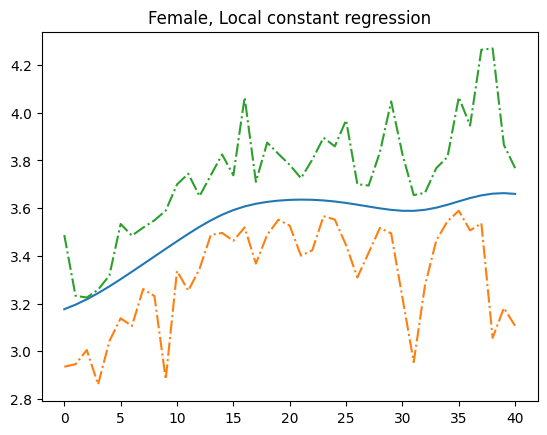

In [5]:
# female
df_temp = df[df.female == 1]
res = KernelReg(endog=df_temp.log_wage,
                exog=df_temp.exp,
                var_type='c',
                reg_type='lc')
x = [i for i in range(41)]
y = res.fit(x)[0]

# bootstrap CI
B = 100
y_bs = []
for i in range(B):
    sys.stdout.write('\r {} / {}   '.format(i+1,B))
    sys.stdout.flush()
    df_b = df_temp.sample(len(df_temp), replace=True)
    res = KernelReg(endog = df_b.log_wage,
                    exog=df_b.exp,
                    var_type='c',
                    reg_type='lc')
    y_bs.append(res.fit(x)[0])
    
lb, ub = [], []
for i in x:
    y_x = np.array([y_bs[j][i] for j in range(len(y_bs))])
    y_x.sort()
    lb.append(y_x[4])
    ub.append(y_x[96])
lb = np.array(lb)
rb = np.array(ub)


fig2, ax = plt.subplots(1,1)
plt.plot(x,y,'-')
plt.plot(x,lb, '-.')
plt.plot(x,ub, '-.')
plt.title('Female, Local constant regression')

Comment: Wage increases as experience increases

(b) Repeat using the Local Linear estimator. How do the estimates and confidence intervals change?



 100 / 100   

Text(0.5, 1.0, 'Male, Local Linear regression')

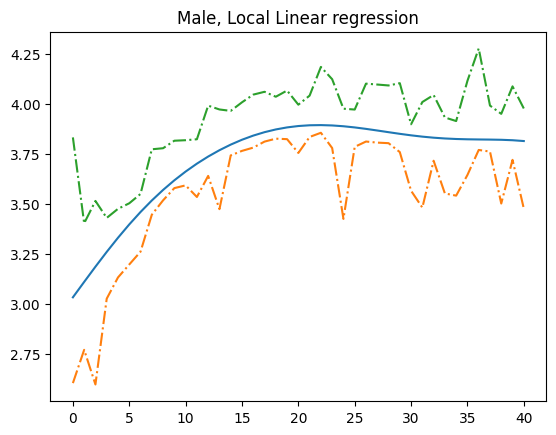

In [6]:
# male
df_temp = df[df.female == 0]
res = KernelReg(endog=df_temp.log_wage,
                exog=df_temp.exp,
                var_type='c',
                reg_type='ll')
x = [i for i in range(41)]
y = res.fit(x)[0]

# bootstrap CI
B = 100
y_bs = []
for i in range(B):
    sys.stdout.write('\r {} / {}   '.format(i+1,B))
    sys.stdout.flush()
    df_b = df_temp.sample(len(df_temp), replace=True)
    res = KernelReg(endog = df_b.log_wage,
                    exog=df_b.exp,
                    var_type='c',
                    reg_type='ll')
    y_bs.append(res.fit(x)[0])
    
lb, ub = [], []
for i in x:
    y_x = np.array([y_bs[j][i] for j in range(len(y_bs))])
    y_x.sort()
    lb.append(y_x[4])
    ub.append(y_x[96])
lb = np.array(lb)
rb = np.array(ub)


fig3, ax = plt.subplots(1,1)
plt.plot(x,y,'-')
plt.plot(x,lb, '-.')
plt.plot(x,ub, '-.')
plt.title('Male, Local Linear regression')

 100 / 100   

Text(0.5, 1.0, 'Female, Local Linear regression')

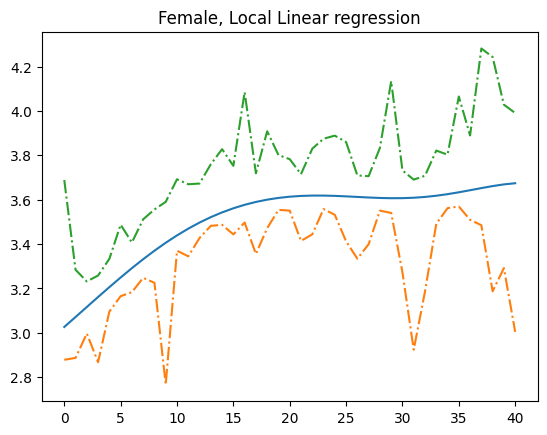

In [7]:
# female
df_temp = df[df.female == 1]
res = KernelReg(endog=df_temp.log_wage,
                exog=df_temp.exp,
                var_type='c',
                reg_type='ll')
x = [i for i in range(41)]
y = res.fit(x)[0]

# bootstrap CI
B = 100
y_bs = []
for i in range(B):
    sys.stdout.write('\r {} / {}   '.format(i+1,B))
    sys.stdout.flush()
    df_b = df_temp.sample(len(df_temp), replace=True)
    res = KernelReg(endog = df_b.log_wage,
                    exog=df_b.exp,
                    var_type='c',
                    reg_type='ll')
    y_bs.append(res.fit(x)[0])
    
lb, ub = [], []
for i in x:
    y_x = np.array([y_bs[j][i] for j in range(len(y_bs))])
    y_x.sort()
    lb.append(y_x[4])
    ub.append(y_x[96])
lb = np.array(lb)
rb = np.array(ub)


fig4, ax = plt.subplots(1,1)
plt.plot(x,y,'-')
plt.plot(x,lb, '-.')
plt.plot(x,ub, '-.')
plt.title('Female, Local Linear regression')

It didn't change much.